### Q2.

In [1]:
# (1)
x = 0.1
y = 0.1 
z = 1.0
println("(x + y) + z = ", (x + y) + z)
println("x + (y + z) = ", x + (y + z))
println("whether association rule for addition works here: ", (x + y) + z == x + (y + z))

(x + y) + z = 1.2
x + (y + z) = 1.2000000000000002
whether association rule for addition works here: false


# explain

In [2]:
# (2)
println("(x * y) * z = ", (x * y) * z)
println("x * (y * z) = ", x * (y * z))
println("whether association rule for multiplication works here: ", (x * y) * z == x * (y * z))

(x * y) * z = 0.010000000000000002
x * (y * z) = 0.010000000000000002
whether association rule for multiplication works here: true


In [3]:
# (3)
# Suppose a = 0.1
a = 0.1 
println("a * (x + y) = ", a * (x + y))
println("a * x + a * y = ", a * x + a * y)
println("whether distributive rule works here: ", a * (x + y) == a * x + a * y)

a * (x + y) = 0.020000000000000004
a * x + a * y = 0.020000000000000004
whether distributive rule works here: true


In [6]:
# (4)
x = Inf
0 * x == 0
println("Is 0 * x == 0 true for all floating-point number x? ", 0 * x == 0)

Is 0 * x == 0 true for all floating-point number x? false


In [8]:
# (5)
a = 10000
x = 0.002
println(x / a)
println(x * (1 / a))
println("Is 0 * x == 0 true for all floating-point number? ", x / a == x * (1 / a) )

2.0e-7
2.0000000000000002e-7
Is 0 * x == 0 true for all floating-point number? false


### Q3.

In [10]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

In [11]:
@time g(10^100)

  0.005770 seconds (1.46 k allocations: 68.080 KB)


-2441406

In [12]:
# (1)
@code_llvm g(2)


define i64 @julia_g_71569(i64) #0 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [13]:
# (2)
@time g(10.0^100)
#@code_llvm g(10.0^100)

  0.014159 seconds (2.75 k allocations: 115.718 KB)


9.765625000000002e106

In [14]:
# (3)
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

In [15]:
@time g_fastmath(10^100)

  0.004309 seconds (2.14 k allocations: 102.955 KB)


-2441406

In [16]:
@code_llvm g_fastmath(10^100)


define i64 @julia_g_fastmath_71657(i64) #0 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [17]:
@code_llvm g_fastmath(10.0^100)


define double @julia_g_fastmath_71664(double) #0 {
top:
  %1 = fmul fast double %0, 9.765625e+06
  %2 = fadd fast double %1, -2.441406e+06
  ret double %2
}


### Q4.

In [1]:
# (1)
function pml1(x)
    y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1
    return y
end

x = collect(0.988:0.001:1.012)
y1 = map(pml1, x);


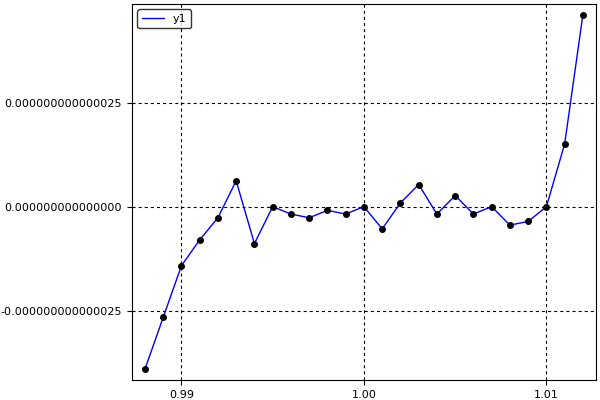

In [3]:
using Plots

plot(x, y1, c=:blue, m=(4,:black))

In [4]:
# (2)
function pml2(x)
    y = (x - 1)^7
    return y
end

y2 = map(pml2, x);


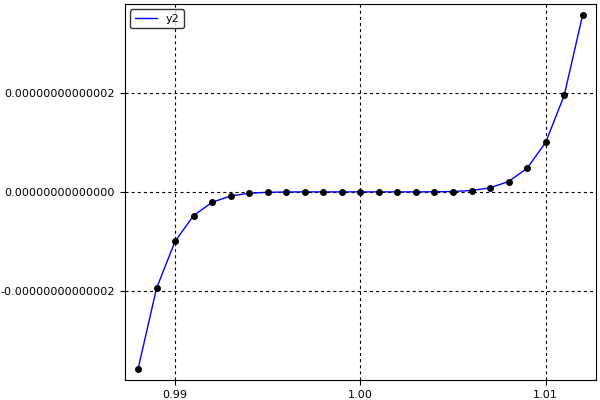

In [8]:
using Plots

plot(x, y2, c=:blue, m=(4,:black), label="y2")

(3). Even though functions in (1) and (2) are mathematically the same, their floating arithmetic results are a little bit different.

### Q5.

In [14]:
# read longley data
data = readdlm("longley.txt");

16×7 Array{Float64,2}:
 60323.0   83.0  234289.0  2356.0  1590.0  107608.0  1947.0
 61122.0   88.5  259426.0  2325.0  1456.0  108632.0  1948.0
 60171.0   88.2  258054.0  3682.0  1616.0  109773.0  1949.0
 61187.0   89.5  284599.0  3351.0  1650.0  110929.0  1950.0
 63221.0   96.2  328975.0  2099.0  3099.0  112075.0  1951.0
 63639.0   98.1  346999.0  1932.0  3594.0  113270.0  1952.0
 64989.0   99.0  365385.0  1870.0  3547.0  115094.0  1953.0
 63761.0  100.0  363112.0  3578.0  3350.0  116219.0  1954.0
 66019.0  101.2  397469.0  2904.0  3048.0  117388.0  1955.0
 67857.0  104.6  419180.0  2822.0  2857.0  118734.0  1956.0
 68169.0  108.4  442769.0  2936.0  2798.0  120445.0  1957.0
 66513.0  110.8  444546.0  4681.0  2637.0  121950.0  1958.0
 68655.0  112.6  482704.0  3813.0  2552.0  123366.0  1959.0
 69564.0  114.2  502601.0  3931.0  2514.0  125368.0  1960.0
 69331.0  115.7  518173.0  4806.0  2572.0  127852.0  1961.0
 70551.0  116.9  554894.0  4007.0  2827.0  130081.0  1962.0

In [31]:
using DataFrames
newname = ["Employment", "Prices", "GNP", "Jobless", "Military", "PopSize", "Year"]
df = DataFrame(data)
names!(df.colindex, map(parse, newname))

# convert "Year" from float to int 
df[:Year] = map(Int64, df[:Year]);

In [32]:
df

,Employment,Prices,GNP,Jobless,Military,PopSize,Year
1,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947
2,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948
3,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949
4,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950
5,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951
6,63639.0,98.1,346999.0,1932.0,3594.0,113270.0,1952
7,64989.0,99.0,365385.0,1870.0,3547.0,115094.0,1953
8,63761.0,100.0,363112.0,3578.0,3350.0,116219.0,1954
9,66019.0,101.2,397469.0,2904.0,3048.0,117388.0,1955
10,67857.0,104.6,419180.0,2822.0,2857.0,118734.0,1956



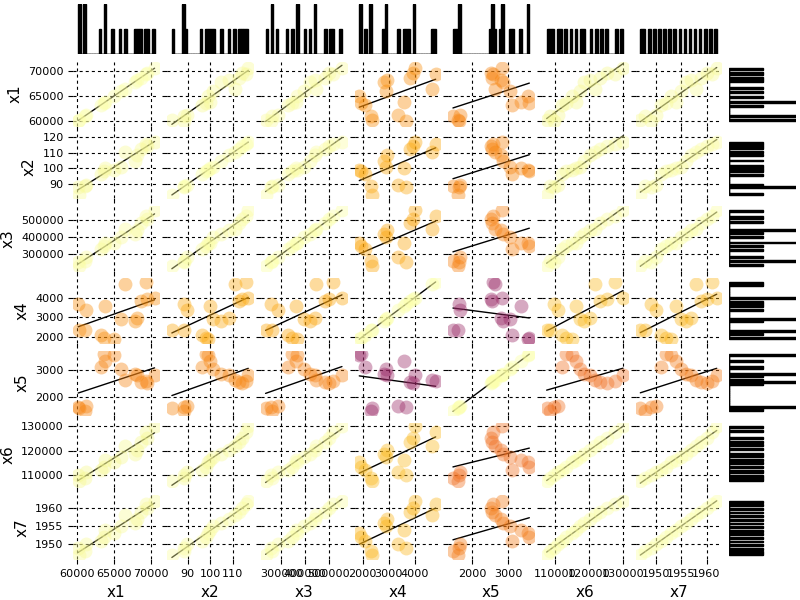

In [41]:
# Plot the pairwise scatter plot 
using StatPlots; 
gr(size=(800,600))
pyplot()
cornerplot(Array(df))

### Q6.

In [18]:
# (1)

H_1 = zeros(5, 5);
@time for i in 1:5
          for j in 1:5
              H_1[i, j] = 1/(i + j -1)
          end
      end
println("H by looping: ", H_1)

@time H_2 = [1/(i + j -1) for i in 1:5, j in 1:5]
println("H by comprehension: ", H_2)

function vec(n)
    x = collect(1:n)
    y = ones(n)
    denominator = *(x, transpose(y)) + *(y, transpose(x)) - ones(n, n)
    return 1./denominator
end
    
@time H_3 = vec(5);
println("H by vectorization: ", H_2)

  0.000366 seconds (25 allocations: 400 bytes)
H by looping: [1.0 0.5 0.333333 0.25 0.2; 0.5 0.333333 0.25 0.2 0.166667; 0.333333 0.25 0.2 0.166667 0.142857; 0.25 0.2 0.166667 0.142857 0.125; 0.2 0.166667 0.142857 0.125 0.111111]
  0.059588 seconds (37.99 k allocations: 2.099 MB)
H by comprehension: [1.0 0.5 0.333333 0.25 0.2; 0.5 0.333333 0.25 0.2 0.166667; 0.333333 0.25 0.2 0.166667 0.142857; 0.25 0.2 0.166667 0.142857 0.125; 0.2 0.166667 0.142857 0.125 0.111111]
  1.057873 seconds (853.65 k allocations: 30.383 MB, 1.05% gc time)
H by vectorization: [1.0 0.5 0.333333 0.25 0.2; 0.5 0.333333 0.25 0.2 0.166667; 0.333333 0.25 0.2 0.166667 0.142857; 0.25 0.2 0.166667 0.142857 0.125; 0.2 0.166667 0.142857 0.125 0.111111]


In [3]:
# (2)
# n = 1000

H_1 = zeros(1000,1000);
@time for i in 1:1000
          for j in 1:1000
              H_1[i, j] = 1/(i + j -1)
          end
      end

@time H_2 = [1/(i + j -1) for i in 1:1000, j in 1:1000]

@time H_3 = vec(1000);


  0.131224 seconds (1.98 M allocations: 30.182 MB, 46.96% gc time)
  0.080957 seconds (19.05 k allocations: 8.422 MB)
  0.030065 seconds (41 allocations: 45.809 MB, 9.89% gc time)


When n is small (n = 5), the most efficient way is by looping; however, when n increases (n = 1000), the most efficient way is by vectorization and worst way is by looping.